In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
%matplotlib inline
os.getcwd()

'/Users/Edureka/Python'

In [2]:
cars=pd.read_csv('../cars.csv')


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [4]:
cars.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
cars.sample(6)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1594,Toyota,Avalon Hybrid,2017,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,39,40,2031,37250
5475,Pontiac,Grand Am,2003,regular unleaded,175.0,6.0,AUTOMATIC,front wheel drive,2.0,NaN,Midsize,Coupe,27,18,210,21690
6076,Volkswagen,Jetta SportWagen,2013,regular unleaded,170.0,5.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Wagon,31,24,873,26195
9658,Buick,Skylark,1998,regular unleaded,150.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,30,19,155,2000
6904,Lincoln,MKZ,2016,regular unleaded,231.0,4.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,33,22,61,45605
4977,Nissan,Frontier,2016,regular unleaded,261.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,Crew Cab Pickup,22,16,2009,24960


In [6]:
cars.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Impute Null Values with Simple Imputer

In [7]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
cols=cars.columns
cols
cars.iloc[:,[3,4,5,8,9]]=imputer.fit_transform(cars.iloc[:,[3,4,5,8,9]])
cars.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [8]:
cars['Market Category'].mode()

0    Crossover
dtype: object

### Convert categorical to continous

In [9]:
categorical=[c for c in cars.columns if cars.dtypes[c]=='object']
continous=[c for c in cars.columns if cars.dtypes[c]!='object']

In [10]:
len(categorical)

8

In [11]:

#cars[categorical].apply(encoder)
cars[categorical]=cars[categorical].apply(lambda x: LabelEncoder().fit_transform(x))

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null int64
Model                11914 non-null int64
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null int64
Engine HP            11914 non-null float64
Engine Cylinders     11914 non-null float64
Transmission Type    11914 non-null int64
Driven_Wheels        11914 non-null int64
Number of Doors      11914 non-null float64
Market Category      11914 non-null int64
Vehicle Size         11914 non-null int64
Vehicle Style        11914 non-null int64
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.5 MB


In [14]:
target=cars['MSRP']
features=cars.drop('MSRP',axis=1)

### Scale the data with Standard Scaler

In [15]:
scaler=StandardScaler()
features=scaler.fit_transform(features)

### Split the data into train and test

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=2303,test_size=0.30)

In [20]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((8339, 15), (8339,), (3575, 15), (3575,))

In [21]:
lm=LinearRegression()

In [22]:
lm_model=lm.fit(xtrain,ytrain)

In [23]:
lm_predict=lm_model.predict(xtest)

In [32]:
mse=mean_squared_error(lm_predict,ytest)
rmse=np.sqrt(mse)
print('RMSE value: ',rmse)
print('R Squared Value: ',r2_score(ytest,lm_predict))
print('Coefficient: ',lm_model.coef_)
print('Intercept: ',lm_model.intercept_)

RMSE value:  49059.79806173879
R Squared Value:  0.4622063191806405
Coefficient:  [ 1783.80599607 -2075.71417455   150.08918603  1599.20913269
 33454.49690369 14958.81287327 -4211.67406956 -2643.06155697
 -4193.3428524  -4476.02917145 -6076.43257037   421.38159382
 17364.57618564 -3678.88172812 -4432.63819095]
Intercept:  40510.16845166831


In [26]:
df=pd.DataFrame({'Actual':ytest,'Predicted':lm_predict})

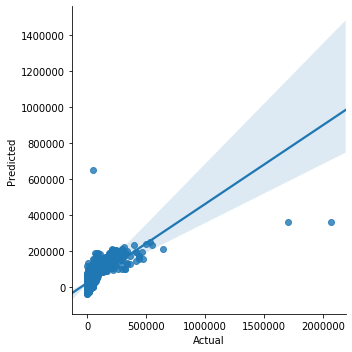

In [27]:
sns.lmplot(x='Actual',y='Predicted',data=df)
plt.show()